In [35]:
import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 
import pandas as pd 
import pandas_datareader.data as web
import datetime
import numpy as np 
from matplotlib import style

# ignore warnings 
import warnings
warnings.filterwarnings('ignore')

In [36]:
import timeseries as ts
from pandas import DataFrame

sarima0000107 = ts.TimeSeries((0, 0, 0), (0, 1, 0, 7))

df = DataFrame(sarima0000107.train_data)
test_df = DataFrame(sarima0000107.test_data)

# sort by date
df = df.sort_values('Fecha')
test_df = test_df.sort_values('Fecha')

# fix the date 
df.reset_index(inplace=True)
df.set_index("Fecha", inplace=True)
test_df.reset_index(inplace=True)
test_df.set_index("Fecha", inplace=True)

df.tail()

Fecha
2017-01-01      123704
2017-01-02    21209771
2017-01-03    26706072
2017-01-04    29734324
2017-01-05    58392417
Name: Ventas, dtype: int64
Model Fitting Time: 0.03267192840576172
                                SARIMAX Results                                
Dep. Variable:                  Ventas   No. Observations:                  912
Model:             SARIMAX(0, 1, 0, 7)   Log Likelihood                1150.048
Date:                 Mon, 30 Nov 2020   AIC                          -2298.096
Time:                         14:14:08   BIC                          -2293.289
Sample:                     01-01-2017   HQIC                         -2296.260
                          - 07-01-2019                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        

,Ventas
Fecha,
2019-06-27,0.349534
2019-06-28,1.000000
2019-06-29,0.436262
2019-06-30,0.352490
2019-07-01,0.141742


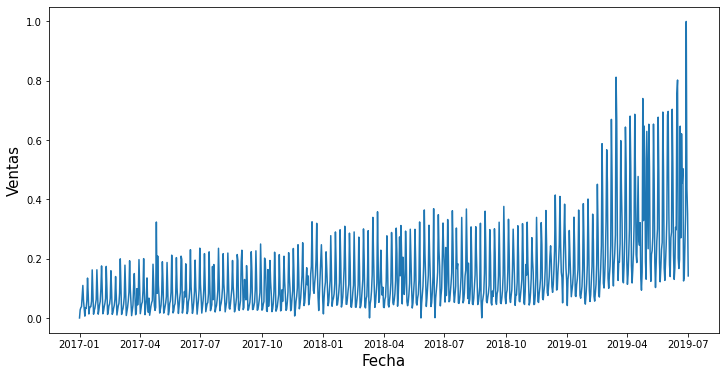

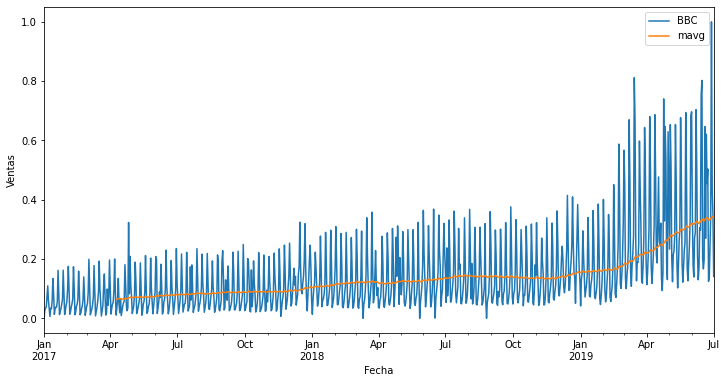

In [37]:
# Visualize the training stock data:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,6))
plt.plot(df["Ventas"])
plt.xlabel('Fecha',fontsize=15)
plt.ylabel('Ventas',fontsize=15)
plt.show()


# Rolling mean
close_px = df['Ventas']
mavg = close_px.rolling(window=100).mean()

plt.figure(figsize = (12,6))
close_px.plot(label='BBC')
mavg.plot(label='mavg')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()

In [43]:
import matplotlib.dates as mdates

# change the dates into ints for training 
dates_df = df.copy()
dates_df = dates_df.reset_index()
test_dates_df = test_df.copy()
test_dates_df = test_dates_df.reset_index()

# Store the original dates for plotting the predicitons
org_dates = dates_df['Fecha']
test_org_dates = test_dates_df['Fecha']

# convert to ints
dates_df['Fecha'] = dates_df['Fecha'].map(mdates.date2num)
test_dates_df['Fecha'] = test_dates_df['Fecha'].map(mdates.date2num)

dates_df.tail()
test_dates_df.tail()

,Fecha,Ventas
178,737420.0,0.700970
179,737421.0,0.544335
180,737422.0,0.295651
181,737423.0,0.415376
182,737424.0,0.220950


In [50]:
# Use sklearn support vector regression to predicit our data:
from sklearn.svm import SVR

dates = dates_df['Fecha'].to_numpy()
prices = df['Ventas'].to_numpy()

test_dates = test_dates_df['Fecha'].to_numpy()
test_prices = test_df['Ventas'].to_numpy()

dates


array([736330., 736331., 736332., 736333., 736334., 736335., 736336.,
       736337., 736338., 736339., 736340., 736341., 736342., 736343.,
       736344., 736345., 736346., 736347., 736348., 736349., 736350.,
       736351., 736352., 736353., 736354., 736355., 736356., 736357.,
       736358., 736359., 736360., 736361., 736362., 736363., 736364.,
       736365., 736366., 736367., 736368., 736369., 736370., 736371.,
       736372., 736373., 736374., 736375., 736376., 736377., 736378.,
       736379., 736380., 736381., 736382., 736383., 736384., 736385.,
       736386., 736387., 736388., 736389., 736390., 736391., 736392.,
       736393., 736394., 736395., 736396., 736397., 736398., 736399.,
       736400., 736401., 736402., 736403., 736404., 736405., 736406.,
       736407., 736408., 736409., 736410., 736411., 736412., 736413.,
       736414., 736415., 736416., 736417., 736418., 736419., 736420.,
       736421., 736422., 736423., 736424., 736425., 736426., 736427.,
       736428., 7364

In [51]:
#Convert to 1d Vector
dates = np.reshape(dates, (len(dates), 1))
prices = np.reshape(prices, (len(prices), 1))

#Convert to 1d Vector
test_dates = np.reshape(test_dates, (len(test_dates), 1))
test_prices = np.reshape(test_prices, (len(test_prices), 1))


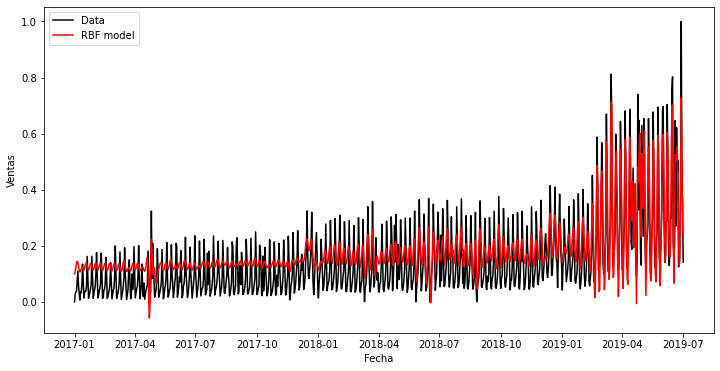

RMSE:  0.173468408041451


In [52]:

svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(dates) - prices) ** 2).mean()))

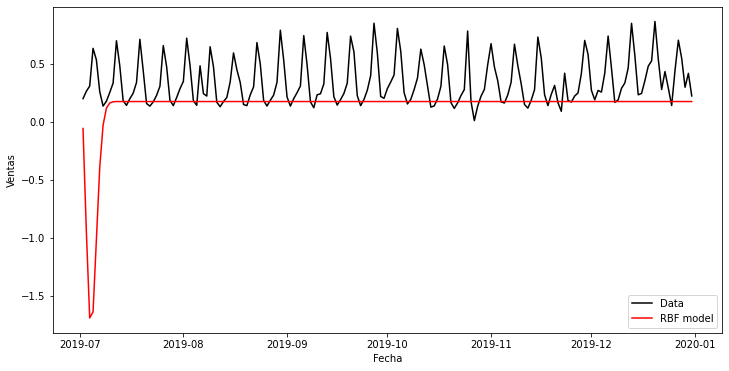

RMSE:  0.3665264233285849


In [55]:

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

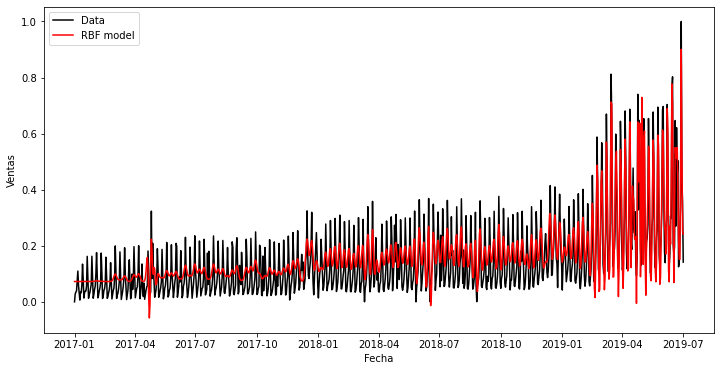

RMSE:  0.17767731980847082


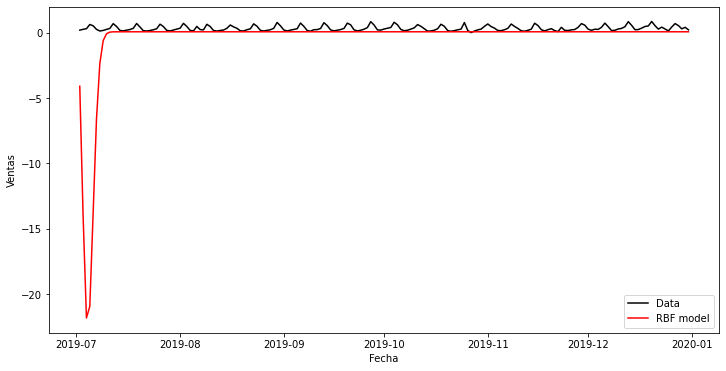

RMSE:  2.814208708932031


array([ -4.09794104, -14.02757425, -21.8379293 , -20.95389874,
       -13.82960842,  -6.62504259,  -2.35825577,  -0.60666702,
        -0.07581194,   0.04688347,   0.06893714,   0.07205988,
         0.07241137,   0.07244303,   0.07244532,   0.07244545,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07244546,
         0.07244546,   0.07244546,   0.07244546,   0.07

In [57]:
svr_rbf = SVR(kernel= 'rbf', C= 1e5, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(dates) - prices) ** 2).mean()))


plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

svr_rbf.predict(test_dates)

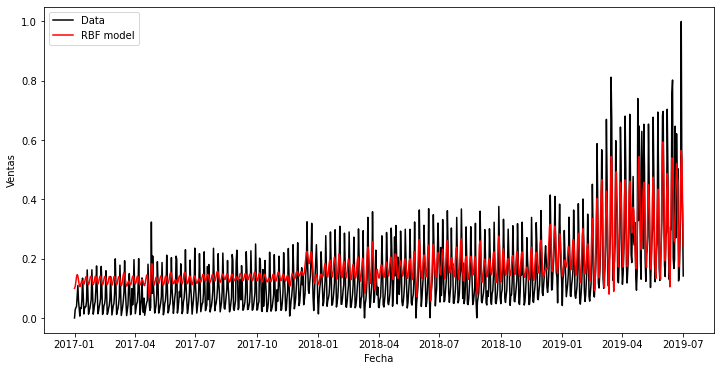

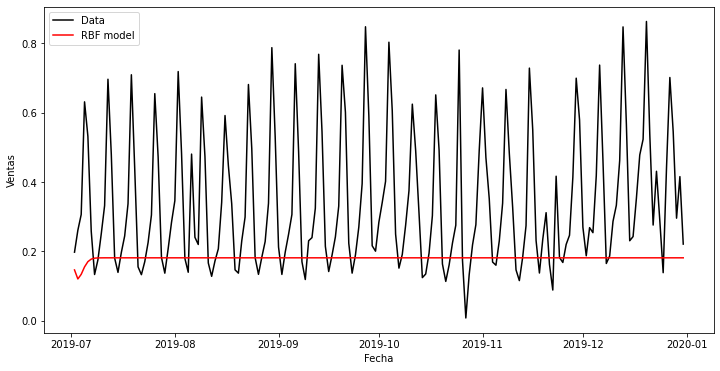

RMSE:  0.25444642641314363


array([[737242.],
       [737243.],
       [737244.],
       [737245.],
       [737246.],
       [737247.],
       [737248.],
       [737249.],
       [737250.],
       [737251.],
       [737252.],
       [737253.],
       [737254.],
       [737255.],
       [737256.],
       [737257.],
       [737258.],
       [737259.],
       [737260.],
       [737261.],
       [737262.],
       [737263.],
       [737264.],
       [737265.],
       [737266.],
       [737267.],
       [737268.],
       [737269.],
       [737270.],
       [737271.],
       [737272.],
       [737273.],
       [737274.],
       [737275.],
       [737276.],
       [737277.],
       [737278.],
       [737279.],
       [737280.],
       [737281.],
       [737282.],
       [737283.],
       [737284.],
       [737285.],
       [737286.],
       [737287.],
       [737288.],
       [737289.],
       [737290.],
       [737291.],
       [737292.],
       [737293.],
       [737294.],
       [737295.],
       [737296.],
       [73

In [59]:
svr_rbf = SVR(kernel= 'rbf', C= 1, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))


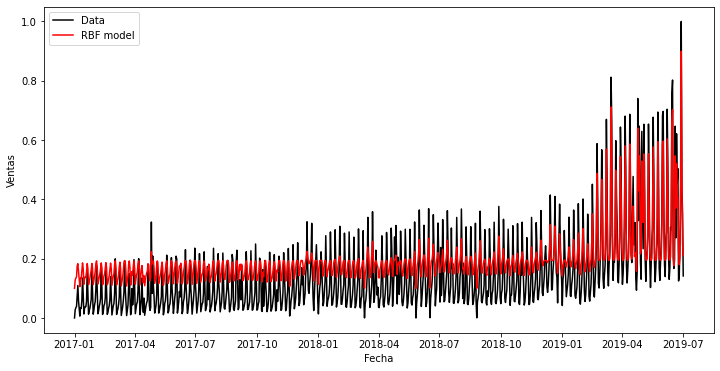

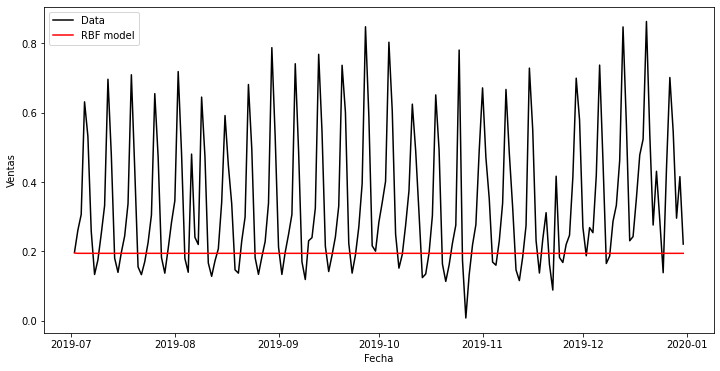

RMSE:  0.24568055395610675


In [62]:
svr_rbf = SVR(kernel= 'rbf', C= 1, gamma= 1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

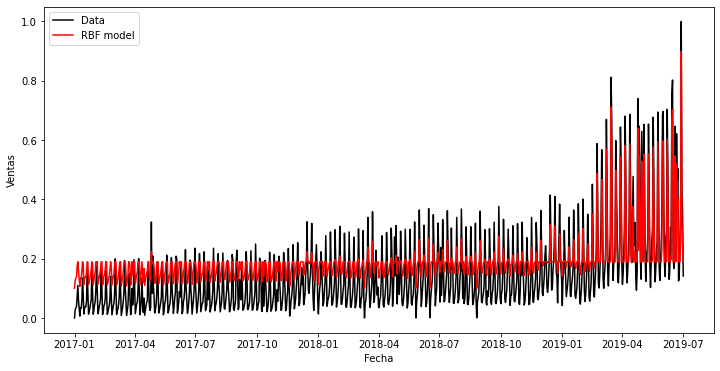

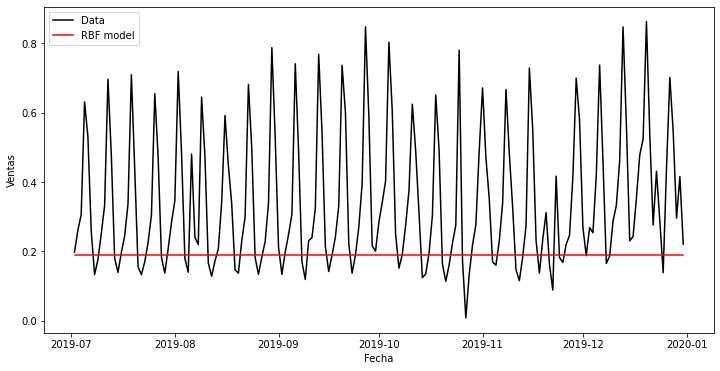

RMSE:  0.24858245720468772


In [63]:
svr_rbf = SVR(kernel= 'rbf', C= 1, gamma= 10)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

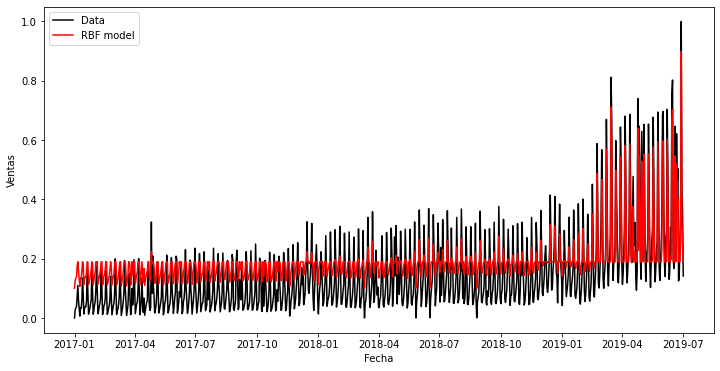

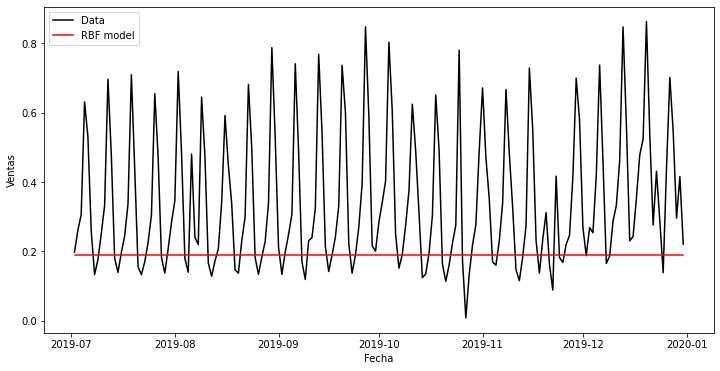

RMSE:  0.24858245720468772


In [64]:
svr_rbf = SVR(kernel= 'rbf', C= 1, gamma= 10)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

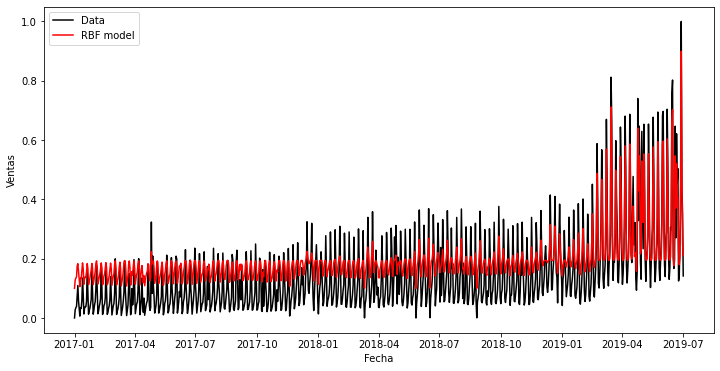

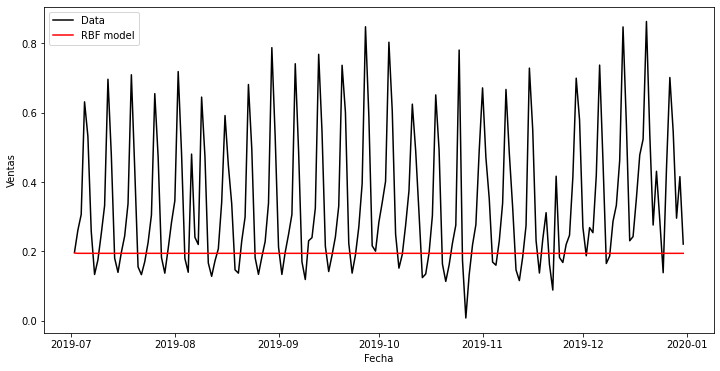

RMSE:  0.24568055395610675


In [65]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

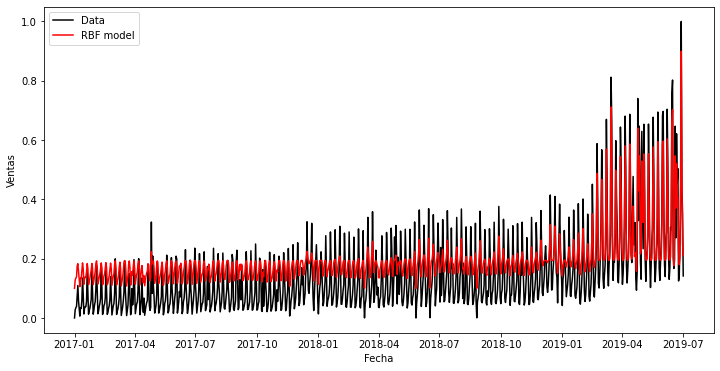

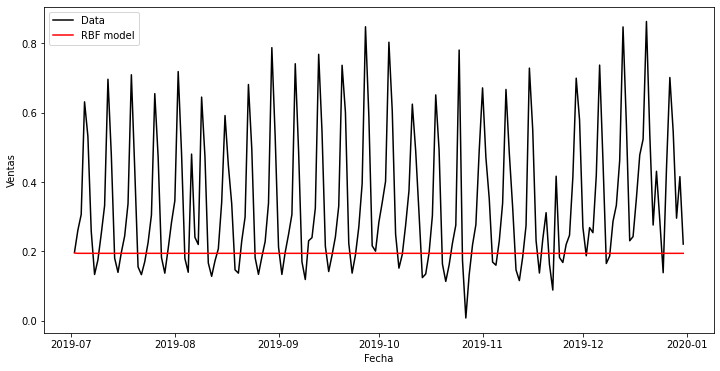

RMSE:  0.24568055395610675


In [66]:
svr_rbf = SVR(kernel= 'rbf', C= 1e5, gamma= 1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

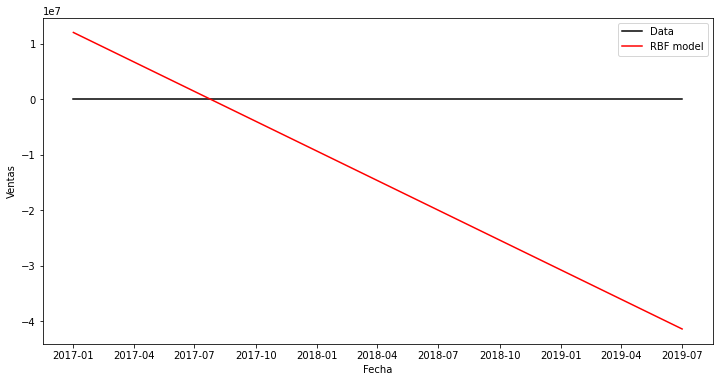

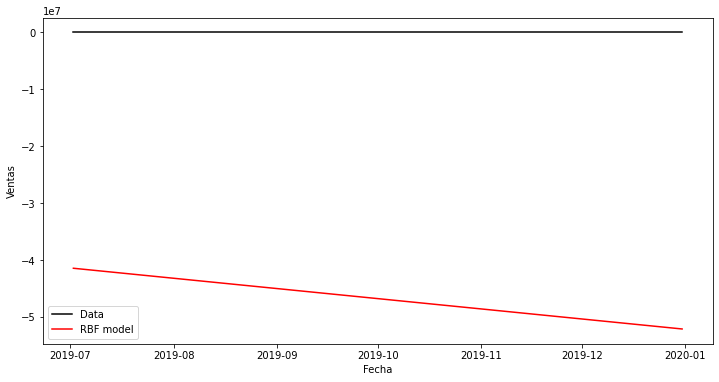

RMSE:  46902504.246858515


In [67]:
svr_rbf = SVR(kernel= 'linear', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

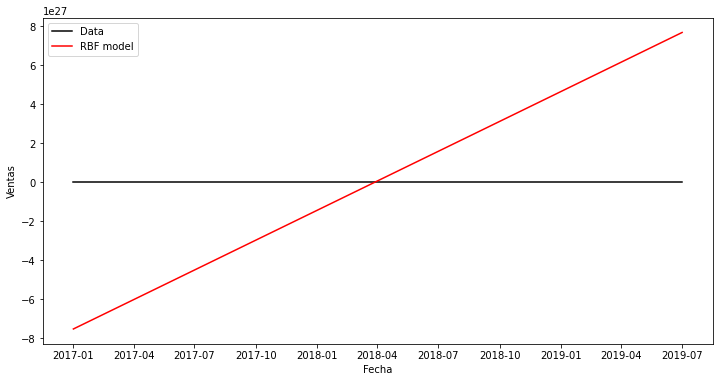

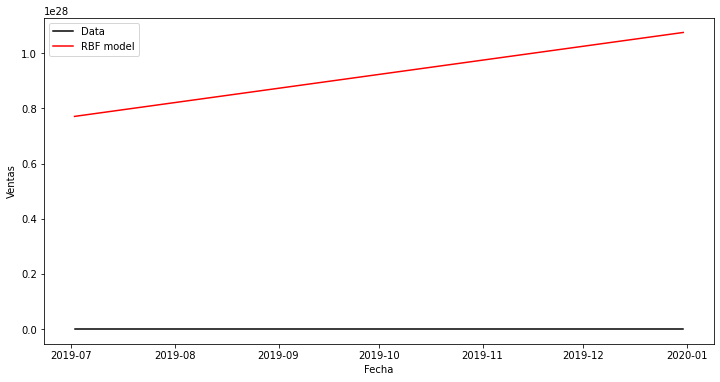

RMSE:  9.274003950758299e+27


In [68]:
svr_rbf = SVR(kernel= 'poly', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

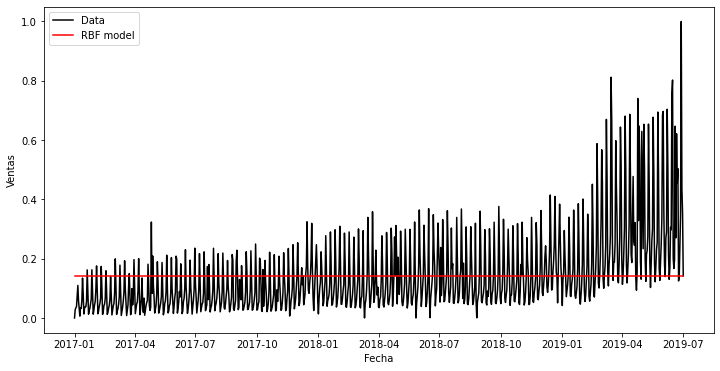

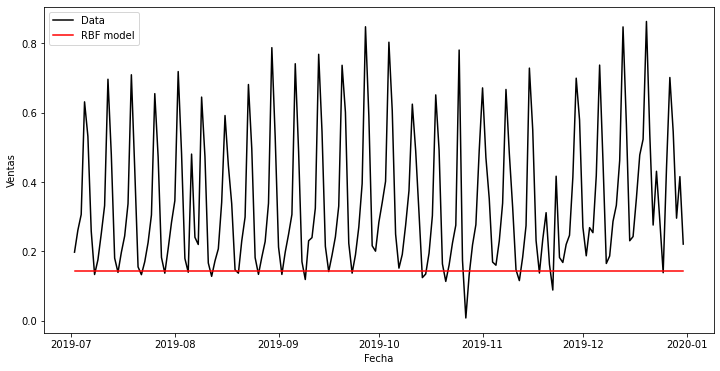

RMSE:  0.27979859152748304


In [69]:
svr_rbf = SVR(kernel= 'sigmoid', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))

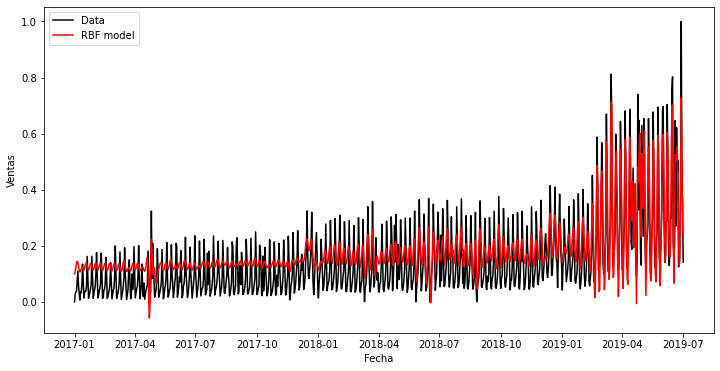

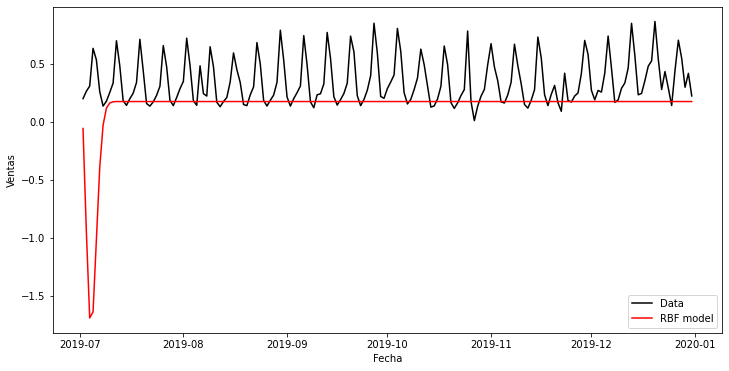

RMSE:  0.3665264233285849


In [70]:
svr_rbf = SVR(kernel= 'rbf', C= 1e3, gamma= 0.1)
svr_rbf.fit(dates, prices)

plt.figure(figsize = (12,6))
plt.plot(dates, prices, color= 'black', label= 'Data')
plt.plot(org_dates, svr_rbf.predict(dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

plt.figure(figsize = (12,6))
plt.plot(test_dates, test_prices, color= 'black', label= 'Data')
plt.plot(test_org_dates, svr_rbf.predict(test_dates), color= 'red', label= 'RBF model') 
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.legend()
plt.show()

print("RMSE: ", np.sqrt(((svr_rbf.predict(test_dates) - test_prices) ** 2).mean()))